# 모듈 import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기

In [3]:
a=pd.read_excel('범죄자_범행시_성별_연령.xlsx')
b=pd.read_csv('범죄자_남녀_및_성인·소년별_전과_20230105174604.csv',encoding='cp949')
student=pd.read_csv('교육통계학생수.csv',encoding='cp949')

In [4]:
b

,남,남.1,남.2,남.3,남.4,남.5,남.6,남.7,남.8,남.9,...,여.166,여.167,여.168,여.169,여.170,여.171,여.172,여.173,여.174,여.175
0,전과있음,전과있음,전과있음,전과있음,전과있음,전과있음,전과있음,전과있음,전과있음,전과있음,...,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상,전과없음/미상
1,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계,...,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계
2,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018,...,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021
3,성인,소년,성인,소년,성인,소년,성인,소년,성인,소년,...,성인,소년,성인,소년,성인,소년,성인,소년,성인,소년
4,731270,26522,737259,24464,773654,23484,696043,21131,623213,19556,...,243036,9924,243467,9511,260880,9246,240825,8442,202662,7271


In [5]:
b.T

,0,1,2,3,4
남,전과있음,소계,2014,성인,731270
남.1,전과있음,소계,2014,소년,26522
남.2,전과있음,소계,2015,성인,737259
남.3,전과있음,소계,2015,소년,24464
남.4,전과있음,소계,2016,성인,773654
...,...,...,...,...,...
여.171,전과없음/미상,소계,2019,소년,9246
여.172,전과없음/미상,소계,2020,성인,240825
여.173,전과없음/미상,소계,2020,소년,8442
여.174,전과없음/미상,소계,2021,성인,202662


In [6]:
b_T=b.T.reset_index()
b_T

,index,0,1,2,3,4
0,남,전과있음,소계,2014,성인,731270
1,남.1,전과있음,소계,2014,소년,26522
2,남.2,전과있음,소계,2015,성인,737259
3,남.3,전과있음,소계,2015,소년,24464
4,남.4,전과있음,소계,2016,성인,773654
...,...,...,...,...,...,...
347,여.171,전과없음/미상,소계,2019,소년,9246
348,여.172,전과없음/미상,소계,2020,성인,240825
349,여.173,전과없음/미상,소계,2020,소년,8442
350,여.174,전과없음/미상,소계,2021,성인,202662


In [7]:
b_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   352 non-null    object
 1   0       352 non-null    object
 2   1       352 non-null    object
 3   2       352 non-null    object
 4   3       352 non-null    object
 5   4       352 non-null    object
dtypes: object(6)
memory usage: 16.6+ KB


In [8]:
b_T.drop(1,axis=1,inplace=True)
#del b_T['1'] #지우고 돌릴 수 없음 바로 적용
b_T

,index,0,2,3,4
0,남,전과있음,2014,성인,731270
1,남.1,전과있음,2014,소년,26522
2,남.2,전과있음,2015,성인,737259
3,남.3,전과있음,2015,소년,24464
4,남.4,전과있음,2016,성인,773654
...,...,...,...,...,...
347,여.171,전과없음/미상,2019,소년,9246
348,여.172,전과없음/미상,2020,성인,240825
349,여.173,전과없음/미상,2020,소년,8442
350,여.174,전과없음/미상,2021,성인,202662


In [9]:
b_T.rename(columns={'index':'성별',0:'전과',2:'year',3:'성인여부',4:'범죄'},inplace=True)
b_T

,성별,전과,year,성인여부,범죄
0,남,전과있음,2014,성인,731270
1,남.1,전과있음,2014,소년,26522
2,남.2,전과있음,2015,성인,737259
3,남.3,전과있음,2015,소년,24464
4,남.4,전과있음,2016,성인,773654
...,...,...,...,...,...
347,여.171,전과없음/미상,2019,소년,9246
348,여.172,전과없음/미상,2020,성인,240825
349,여.173,전과없음/미상,2020,소년,8442
350,여.174,전과없음/미상,2021,성인,202662


In [10]:
b_T[b_T['성별'].str.contains('남')]

,성별,전과,year,성인여부,범죄
0,남,전과있음,2014,성인,731270
1,남.1,전과있음,2014,소년,26522
2,남.2,전과있음,2015,성인,737259
3,남.3,전과있음,2015,소년,24464
4,남.4,전과있음,2016,성인,773654
...,...,...,...,...,...
171,남.171,전과없음/미상,2019,소년,35540
172,남.172,전과없음/미상,2020,성인,640539
173,남.173,전과없음/미상,2020,소년,34738
174,남.174,전과없음/미상,2021,성인,506548


In [11]:
b_T.loc[:175,'성별']='남'
b_T.loc[176:,'성별']='여'
b_T

,성별,전과,year,성인여부,범죄
0,남,전과있음,2014,성인,731270
1,남,전과있음,2014,소년,26522
2,남,전과있음,2015,성인,737259
3,남,전과있음,2015,소년,24464
4,남,전과있음,2016,성인,773654
...,...,...,...,...,...
347,여,전과없음/미상,2019,소년,9246
348,여,전과없음/미상,2020,성인,240825
349,여,전과없음/미상,2020,소년,8442
350,여,전과없음/미상,2021,성인,202662


In [12]:
b_T.성별.value_counts()

남    176
여    176
Name: 성별, dtype: int64

In [13]:
b_T=b_T[['year','성별','성인여부','전과','범죄']]
b_T

,year,성별,성인여부,전과,범죄
0,2014,남,성인,전과있음,731270
1,2014,남,소년,전과있음,26522
2,2015,남,성인,전과있음,737259
3,2015,남,소년,전과있음,24464
4,2016,남,성인,전과있음,773654
...,...,...,...,...,...
347,2019,여,소년,전과없음/미상,9246
348,2020,여,성인,전과없음/미상,240825
349,2020,여,소년,전과없음/미상,8442
350,2021,여,성인,전과없음/미상,202662


In [14]:
b_T.loc[b_T['전과'] == '전과있음', '전과'] = 1
b_T.loc[b_T['전과'] == '전과없음/미상', '전과'] = 0
b_T

,year,성별,성인여부,전과,범죄
0,2014,남,성인,1,731270
1,2014,남,소년,1,26522
2,2015,남,성인,1,737259
3,2015,남,소년,1,24464
4,2016,남,성인,1,773654
...,...,...,...,...,...
347,2019,여,소년,0,9246
348,2020,여,성인,0,240825
349,2020,여,소년,0,8442
350,2021,여,성인,0,202662


In [15]:
b_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    352 non-null    object
 1   성별      352 non-null    object
 2   성인여부    352 non-null    object
 3   전과      352 non-null    object
 4   범죄      352 non-null    object
dtypes: object(5)
memory usage: 13.9+ KB


In [16]:
b_T=b_T.astype({'year':'category','성별':'category','성인여부':'category','전과':'category','범죄':'int'})
b_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   year    352 non-null    category
 1   성별      352 non-null    category
 2   성인여부    352 non-null    category
 3   전과      352 non-null    category
 4   범죄      352 non-null    int32   
dtypes: category(4), int32(1)
memory usage: 3.6 KB


In [17]:
b_T.sort_values(['year','성별','성인여부','전과'],inplace=True)
b_T

,year,성별,성인여부,전과,범죄
160,2014,남,성인,0,716092
0,2014,남,성인,1,731270
16,2014,남,성인,1,149454
32,2014,남,성인,1,112421
48,2014,남,성인,1,85033
...,...,...,...,...,...
271,2021,여,소년,1,119
287,2021,여,소년,1,59
303,2021,여,소년,1,47
319,2021,여,소년,1,26


In [18]:
b_T=b_T.reset_index().drop('index',axis=1)
b_T

,year,성별,성인여부,전과,범죄
0,2014,남,성인,0,716092
1,2014,남,성인,1,731270
2,2014,남,성인,1,149454
3,2014,남,성인,1,112421
4,2014,남,성인,1,85033
...,...,...,...,...,...
347,2021,여,소년,1,119
348,2021,여,소년,1,59
349,2021,여,소년,1,47
350,2021,여,소년,1,26


In [19]:
b_T.groupby("year")['범죄'].sum()

year
2014    2701219
2015    2745472
2016    2870564
2017    2628902
2018    2434834
2019    2440929
2020    2267960
2021    1921855
Name: 범죄, dtype: int32

<AxesSubplot:xlabel='year'>

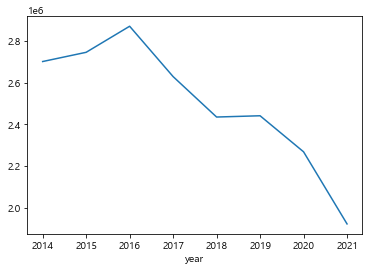

In [20]:
b_T.groupby("year")['범죄'].sum().plot()

In [21]:
b_T.groupby(["year",'성인여부','전과'])['범죄'].sum()

year  성인여부  전과
2014  성인    0      949328
            1     1644672
      소년    0       47915
            1       59304
2015  성인    0      988319
            1     1659064
      소년    0       43979
            1       54110
2016  성인    0     1026868
            1     1741436
      소년    0       49740
            1       52520
2017  성인    0      958710
            1     1573398
      소년    0       48714
            1       48080
2018  성인    0      929281
            1     1417110
      소년    0       43827
            1       44616
2019  성인    0      961233
            1     1391996
      소년    0       44786
            1       42914
2020  성인    0      881364
            1     1300820
      소년    0       43180
            1       42596
2021  성인    0      709210
            1     1142272
      소년    0       37661
            1       32712
Name: 범죄, dtype: int32

In [22]:
b_T_group_sum=b_T.groupby(["year",'성인여부','전과'])['범죄'].sum()
l=[]
ll=[]
for i in range(2014,2022):
    l.append(b_T_group_sum[f'{i}','소년',0])
    ll.append(b_T_group_sum[f'{i}','소년',1])
l,ll

([47915, 43979, 49740, 48714, 43827, 44786, 43180, 37661],
 [59304, 54110, 52520, 48080, 44616, 42914, 42596, 32712])

In [23]:
year=[i for i in range(2014,2022)]

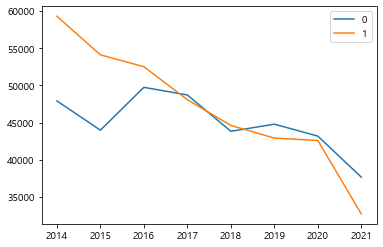

In [24]:
plt.plot(year,l,label='0')
plt.plot(year,ll,label='1')
plt.legend()

In [25]:
student

,지역구분,항목구분,자료구분,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,Unnamed: 11
0,전국,,합계,6955021.0,6789696.0,6606524.0,6440327.0,6281469.0,6111567.0,5987096.0,5929026.0,NaN
1,시지역,,합계,3003236.0,2918198.0,2822174.0,2734585.0,2648850.0,2557426.0,2494615.0,2455754.0,NaN
2,도지역,,합계,3951785.0,3871498.0,3784350.0,3705742.0,3632619.0,3554141.0,3492481.0,3473272.0,NaN


In [26]:
s=student.drop([' 항목구분',' 자료구분','Unnamed: 11'],axis=1)
s

,지역구분,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,전국,6955021.0,6789696.0,6606524.0,6440327.0,6281469.0,6111567.0,5987096.0,5929026.0
1,시지역,3003236.0,2918198.0,2822174.0,2734585.0,2648850.0,2557426.0,2494615.0,2455754.0
2,도지역,3951785.0,3871498.0,3784350.0,3705742.0,3632619.0,3554141.0,3492481.0,3473272.0


In [27]:
s.set_index('지역구분',inplace=True)
s=s.astype('int')
s

,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
지역구분,,,,,,,,
전국,6955021,6789696,6606524,6440327,6281469,6111567,5987096,5929026
시지역,3003236,2918198,2822174,2734585,2648850,2557426,2494615,2455754
도지역,3951785,3871498,3784350,3705742,3632619,3554141,3492481,3473272


In [28]:
lll=list(s.loc['전국'].values)
lll=[lll[i]//100 for i in range(len(lll))]
lll

[69550, 67896, 66065, 64403, 62814, 61115, 59870, 59290]

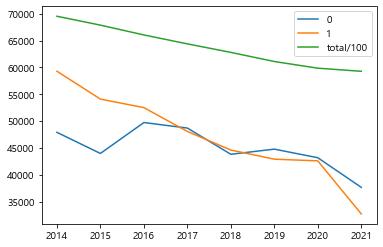

In [29]:
plt.plot(year,l,label='0')
plt.plot(year,ll,label='1')
plt.plot(year,lll,label='total/100')
plt.legend()

In [30]:
l_ll=[i+j for i,j in zip(l,ll)]
l_ll

[107219, 98089, 102260, 96794, 88443, 87700, 85776, 70373]

In [31]:
llll= [i/j*10 for i,j in zip(l_ll,lll)]

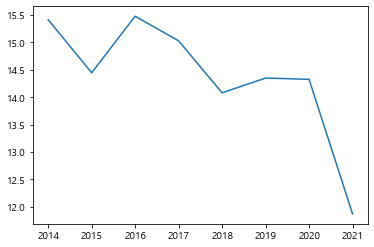

In [32]:
plt.plot(year,llll)

# 범죄 종류별 수

In [33]:
a

,죄종별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17,2021.18
0,죄종별(1),계,남자,남자,남자,남자,남자,남자,남자,남자,...,남자,여자,여자,여자,여자,여자,여자,여자,여자,여자
1,죄종별(1),계,계,20세이하,21-30세,31-40세,41-50세,51-60세,61-70세,71세이상,...,미상,계,20세이하,21-30세,31-40세,41-50세,51-60세,61-70세,71세이상,미상
2,계,1581922.0,1257998.0,83507.0,205601.0,231691.0,283902.0,285879.0,125642.0,40348.0,...,1153.0,273150.0,15500.0,42459.0,46395.0,58471.0,61980.0,34570.0,13068.0,707.0
3,강력범죄,28302.0,27114.0,3126.0,6091.0,4922.0,5252.0,4817.0,2024.0,854.0,...,17.0,1085.0,149.0,250.0,192.0,218.0,178.0,66.0,23.0,9.0
4,절도범죄,97334.0,73234.0,17128.0,12479.0,9815.0,10554.0,11915.0,6969.0,4320.0,...,46.0,24489.0,1884.0,2298.0,2505.0,3325.0,5030.0,5010.0,4419.0,18.0
5,폭력범죄,348969.0,289802.0,26245.0,47443.0,53292.0,66511.0,63783.0,24563.0,7642.0,...,201.0,48573.0,4813.0,8619.0,8907.0,9773.0,9156.0,5082.0,2142.0,81.0
6,지능범죄,292114.0,224176.0,14307.0,33430.0,37743.0,56172.0,55703.0,20933.0,5491.0,...,453.0,49629.0,3621.0,8114.0,7018.0,9963.0,12108.0,6704.0,1859.0,242.0
7,풍속범죄,32183.0,28119.0,2129.0,5495.0,5625.0,5120.0,6601.0,2650.0,484.0,...,14.0,2720.0,231.0,389.0,235.0,275.0,708.0,672.0,208.0,2.0


In [34]:
#a.set_index('죄종별(1)',inplace=True) index name이 생겨버린다
a.index=a['죄종별(1)'].values

In [35]:
a.index.values[0]='성별'
a.index.values[1]='나이'
a

,죄종별(1),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2021.9,2021.10,2021.11,2021.12,2021.13,2021.14,2021.15,2021.16,2021.17,2021.18
성별,성별,계,남자,남자,남자,남자,남자,남자,남자,남자,...,남자,여자,여자,여자,여자,여자,여자,여자,여자,여자
나이,나이,계,계,20세이하,21-30세,31-40세,41-50세,51-60세,61-70세,71세이상,...,미상,계,20세이하,21-30세,31-40세,41-50세,51-60세,61-70세,71세이상,미상
계,계,1581922.0,1257998.0,83507.0,205601.0,231691.0,283902.0,285879.0,125642.0,40348.0,...,1153.0,273150.0,15500.0,42459.0,46395.0,58471.0,61980.0,34570.0,13068.0,707.0
강력범죄,강력범죄,28302.0,27114.0,3126.0,6091.0,4922.0,5252.0,4817.0,2024.0,854.0,...,17.0,1085.0,149.0,250.0,192.0,218.0,178.0,66.0,23.0,9.0
절도범죄,절도범죄,97334.0,73234.0,17128.0,12479.0,9815.0,10554.0,11915.0,6969.0,4320.0,...,46.0,24489.0,1884.0,2298.0,2505.0,3325.0,5030.0,5010.0,4419.0,18.0
폭력범죄,폭력범죄,348969.0,289802.0,26245.0,47443.0,53292.0,66511.0,63783.0,24563.0,7642.0,...,201.0,48573.0,4813.0,8619.0,8907.0,9773.0,9156.0,5082.0,2142.0,81.0
지능범죄,지능범죄,292114.0,224176.0,14307.0,33430.0,37743.0,56172.0,55703.0,20933.0,5491.0,...,453.0,49629.0,3621.0,8114.0,7018.0,9963.0,12108.0,6704.0,1859.0,242.0
풍속범죄,풍속범죄,32183.0,28119.0,2129.0,5495.0,5625.0,5120.0,6601.0,2650.0,484.0,...,14.0,2720.0,231.0,389.0,235.0,275.0,708.0,672.0,208.0,2.0


In [36]:
a.T

,성별,나이,계,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄
죄종별(1),성별,나이,계,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄
2018,계,계,1581922.0,28302.0,97334.0,348969.0,292114.0,32183.0
2018.1,남자,계,1257998.0,27114.0,73234.0,289802.0,224176.0,28119.0
2018.2,남자,20세이하,83507.0,3126.0,17128.0,26245.0,14307.0,2129.0
2018.3,남자,21-30세,205601.0,6091.0,12479.0,47443.0,33430.0,5495.0
...,...,...,...,...,...,...,...,...
2021.14,여자,41-50세,58471.0,218.0,3325.0,9773.0,9963.0,275.0
2021.15,여자,51-60세,61980.0,178.0,5030.0,9156.0,12108.0,708.0
2021.16,여자,61-70세,34570.0,66.0,5010.0,5082.0,6704.0,672.0
2021.17,여자,71세이상,13068.0,23.0,4419.0,2142.0,1859.0,208.0


In [37]:
a_T=a.T[a.T['나이']=='20세이하']
a_T

,성별,나이,계,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄
2018.2,남자,20세이하,83507.0,3126.0,17128.0,26245.0,14307.0,2129.0
2018.11,여자,20세이하,19352.0,205.0,3094.0,7025.0,3541.0,138.0
2019.2,남자,20세이하,84908.0,3342.0,17259.0,24921.0,16076.0,2231.0
2019.11,여자,20세이하,19284.0,218.0,3073.0,6880.0,3568.0,137.0
2020.2,남자,20세이하,84696.0,2707.0,17205.0,21075.0,18926.0,3136.0
2020.11,여자,20세이하,18347.0,190.0,2497.0,5410.0,4146.0,177.0
2021.2,남자,20세이하,68997.0,2293.0,12772.0,18005.0,12981.0,3373.0
2021.11,여자,20세이하,15500.0,149.0,1884.0,4813.0,3621.0,231.0


In [38]:
a_T.reset_index(drop=True,inplace=True)
a_T

,성별,나이,계,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄
0,남자,20세이하,83507.0,3126.0,17128.0,26245.0,14307.0,2129.0
1,여자,20세이하,19352.0,205.0,3094.0,7025.0,3541.0,138.0
2,남자,20세이하,84908.0,3342.0,17259.0,24921.0,16076.0,2231.0
3,여자,20세이하,19284.0,218.0,3073.0,6880.0,3568.0,137.0
4,남자,20세이하,84696.0,2707.0,17205.0,21075.0,18926.0,3136.0
5,여자,20세이하,18347.0,190.0,2497.0,5410.0,4146.0,177.0
6,남자,20세이하,68997.0,2293.0,12772.0,18005.0,12981.0,3373.0
7,여자,20세이하,15500.0,149.0,1884.0,4813.0,3621.0,231.0


In [39]:
a_T.drop(['나이','계'],axis=1,inplace=True)

In [40]:
a_T_m=a_T[a_T['성별']=='남자']
a_T_w=a_T[a_T['성별']=='여자']

<AxesSubplot:>

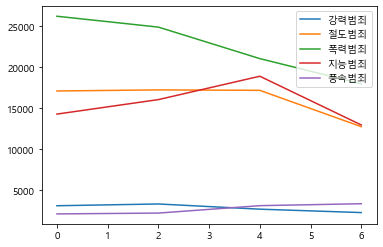

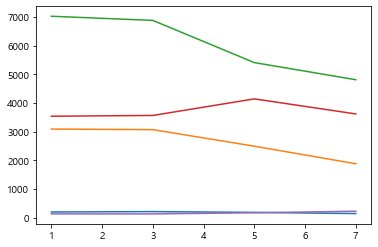

In [43]:
a_T_m.plot()
a_T_w.plot(legend=False)